<a href="https://colab.research.google.com/github/jimenaCastro73/challenge-telecomX-parte2/blob/main/TelecomX_2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos

## Extracción del Archivo Tratado

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# URL del archivo JSON con los datos limpios de la Parte 1
url = 'https://raw.githubusercontent.com/jimenaCastro73/challenge-telecomX-parte1/main/data/df_clientes_limpio.json'

datos_clientes = pd.read_json(url)

datos_clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,HasInternet,NumServices
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.186667,1,5
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1,4
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,1,3
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,1,6
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,1,4


## Eliminación de Columnas Irrelevantes

In [6]:
import pandas as pd

# 1. Extracción del Archivo Tratado
url = 'https://raw.githubusercontent.com/jimenaCastro73/challenge-telecomX-parte1/main/data/df_clientes_limpio.json'
df_clientes = pd.read_json(url)

print("Datos originales cargados. Dimensiones:", df_clientes.shape)
print("Columnas originales:", df_clientes.columns.tolist())

# 2. Eliminación de Columnas Irrelevantes y Redundantes
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'customerID',        # Identificador único
    'Charges.Total',     # Redundante con tenure y Charges.Monthly
    'Cuentas_Diarias',   # Derivada de Charges.Monthly
    'HasInternet',       # Redundante con InternetService
    'NumServices'        # Derivada de la suma de servicios
]

# Creamos el nuevo DataFrame preparado para el modelado
df_preparado = df_clientes.drop(columns=columnas_a_eliminar)

print("\nColumnas irrelevantes eliminadas.")
print("Nuevas dimensiones del DataFrame:", df_preparado.shape)
print("Columnas restantes:", df_preparado.columns.tolist())

# Verificamos las primeras filas del DataFrame final de esta etapa
print("\nVista previa de los datos preparados:")
df_preparado.head()

Datos originales cargados. Dimensiones: (7267, 24)
Columnas originales: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'HasInternet', 'NumServices']

Columnas irrelevantes eliminadas.
Nuevas dimensiones del DataFrame: (7267, 19)
Columnas restantes: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly']

Vista previa de los datos preparados:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6
1,0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9
2,1,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9
3,1,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0
4,1,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9


## Encoding

Identificar las variables categóricas a transformar
Primero, identifiquemos automáticamente todas las columnas que son de tipo object, ya que esas son las que necesitan ser codificadas.

In [7]:
# Partimos del DataFrame df_preparado del paso anterior
print("Columnas y sus tipos de datos antes del encoding:")
print(df_preparado.info())

# Identificar automáticamente las columnas de tipo 'object'
columnas_categoricas = df_preparado.select_dtypes(include=['object']).columns

print(f"\nSe han identificado {len(columnas_categoricas)} columnas categóricas para transformar:")
print(columnas_categoricas.tolist())

Columnas y sus tipos de datos antes del encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 1

Aplicar One-Hot Encoding

Ahora, usaremos pd.get_dummies() para realizar la transformación. Le pasaremos el DataFrame y la lista de columnas que queremos transformar.
Usaremos un parámetro importante: drop_first=True. Esto elimina la primera categoría de cada variable. Por ejemplo, si un cliente no tiene InternetService_DSL y no tiene InternetService_Fiber optic, es obvio que su valor es 'No'. No necesitamos una tercera columna, ya que la información es redundante.

In [8]:
# Aplicar one-hot encoding
df_codificado = pd.get_dummies(df_preparado,
                               columns=columnas_categoricas,
                               drop_first=True)

print("\n¡Encoding completado!")


¡Encoding completado!


Verificar el resultado

Debería tener más columnas, y todas ellas deben ser numéricas.

In [9]:
# Mostrar las primeras filas para ver las nuevas columnas
print("Vista previa de los datos después del encoding:")
df_codificado.head()

# Revisar los tipos de datos para confirmar que no quedan columnas 'object'
print("\nInformación del DataFrame final codificado:")
df_codificado.info()

# Comprobar las nuevas dimensiones
print("\nDimensiones finales:", df_codificado.shape)

Vista previa de los datos después del encoding:

Información del DataFrame final codificado:
<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   int64  
 1   gender                                 7267 non-null   int64  
 2   SeniorCitizen                          7267 non-null   int64  
 3   Partner                                7267 non-null   int64  
 4   Dependents                             7267 non-null   int64  
 5   tenure                                 7267 non-null   int64  
 6   PhoneService                           7267 non-null   int64  
 7   MultipleLines                          7267 non-null   int64  
 8   OnlineSecurity                         7267 non-null   int64  
 9   OnlineBackup                           7267 non-null

In [10]:
df_codificado.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,Charges.Monthly,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,0,0,1,...,0,1,65.6,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,1,0,0,...,1,0,59.9,False,False,False,False,False,False,True
2,1,1,0,0,0,4,1,0,0,0,...,0,1,73.9,True,False,False,False,False,True,False
3,1,1,1,1,0,13,1,0,0,1,...,1,1,98.0,True,False,False,False,False,True,False
4,1,0,1,1,0,3,1,0,0,0,...,0,1,83.9,True,False,False,False,False,False,True


## Verificación de la Proporción de Cancelación (Churn)

Contar los valores absolutos

Primero, vamos a ver el número exacto de clientes en cada categoría.

In [13]:
# Partimos del DataFrame df_codificado del paso anterior

# Contar cuántos clientes hay en cada categoría de 'Churn'
# 0 = No canceló (se quedó)
# 1 = Sí canceló (se fue)
conteo_churn = df_codificado['Churn'].value_counts()

print("Conteo de clientes por categoría de Churn:")
print(conteo_churn)

Conteo de clientes por categoría de Churn:
Churn
0    5398
1    1869
Name: count, dtype: int64


Calcular la proporción (porcentaje)

In [14]:
# Calcular la proporción de clientes en cada categoría
proporcion_churn = df_codificado['Churn'].value_counts(normalize=True) * 100

print("\nProporción de clientes por categoría de Churn (%):")
print(proporcion_churn)


Proporción de clientes por categoría de Churn (%):
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


visualizar el desbalance

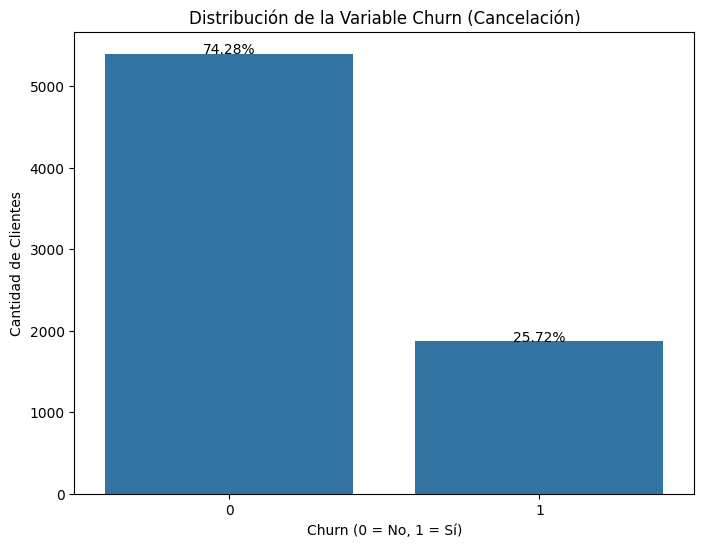

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de conteo para visualizar el desbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_codificado)
plt.title('Distribución de la Variable Churn (Cancelación)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')

# Mostrar los porcentajes en el gráfico
total = len(df_codificado)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(100 * height/total),
            ha="center")

plt.show()

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

Calcular la matriz de correlación
Usaremos el método .corr() en nuestro DataFrame ya codificado.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Partimos del DataFrame df_codificado del paso anterior

# Calcular la matriz de correlación
matriz_correlacion = df_codificado.corr()

Visualizar la correlación con Churn (la parte más importante)
Una matriz completa puede ser abrumadora. Lo que realmente nos importa es la correlación de todas las variables con nuestra variable objetivo, Churn. Vamos a aislar esa información, ordenarla y mostrarla.

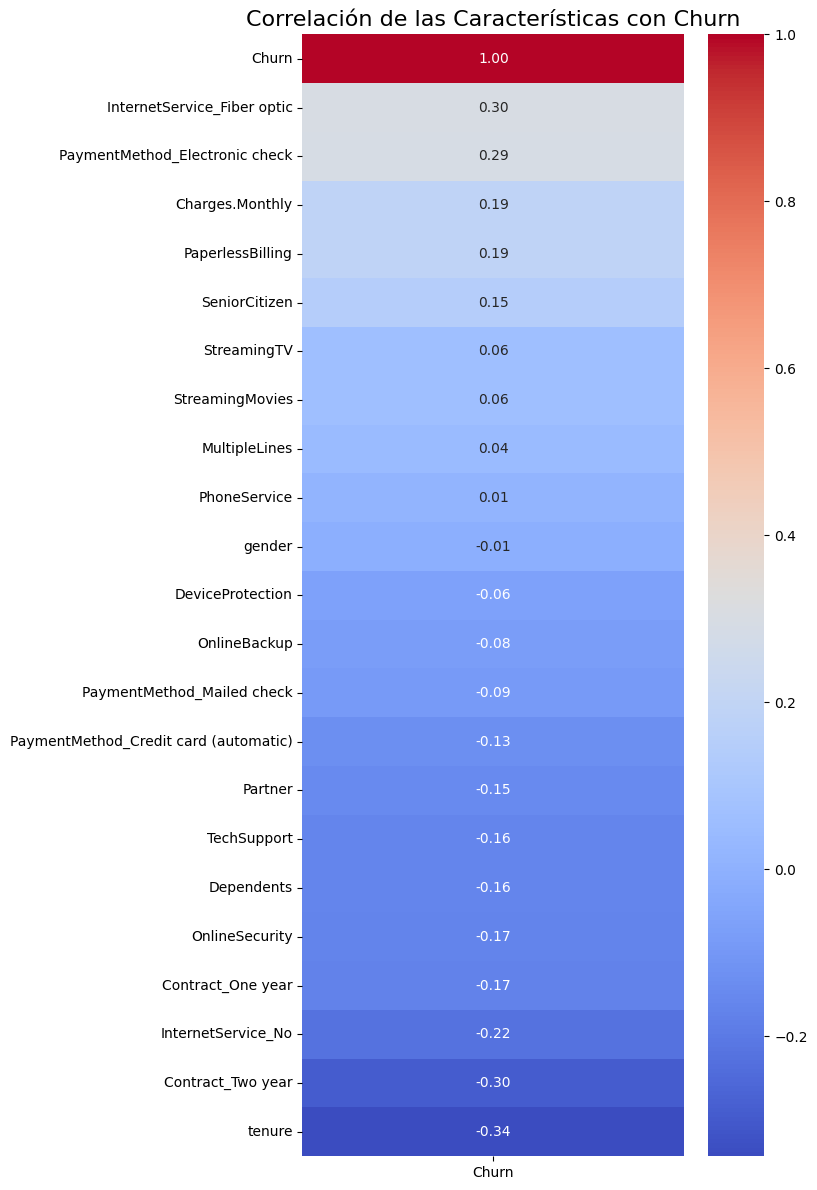

In [20]:
# 1. Seleccionar solo la columna de 'Churn' y convertirla en un DataFrame
correlacion_target = matriz_correlacion[['Churn']].sort_values(by='Churn', ascending=False)

# 2. Configurar el tamaño del gráfico
plt.figure(figsize=(8, 12))

# 3. Crear el heatmap
heatmap_churn = sns.heatmap(correlacion_target,
                            annot=True,
                            cmap='coolwarm',
                            fmt='.2f')

# 4. Añadir título y ajustar el layout
plt.title('Correlación de las Características con Churn', fontsize=16)
plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show()

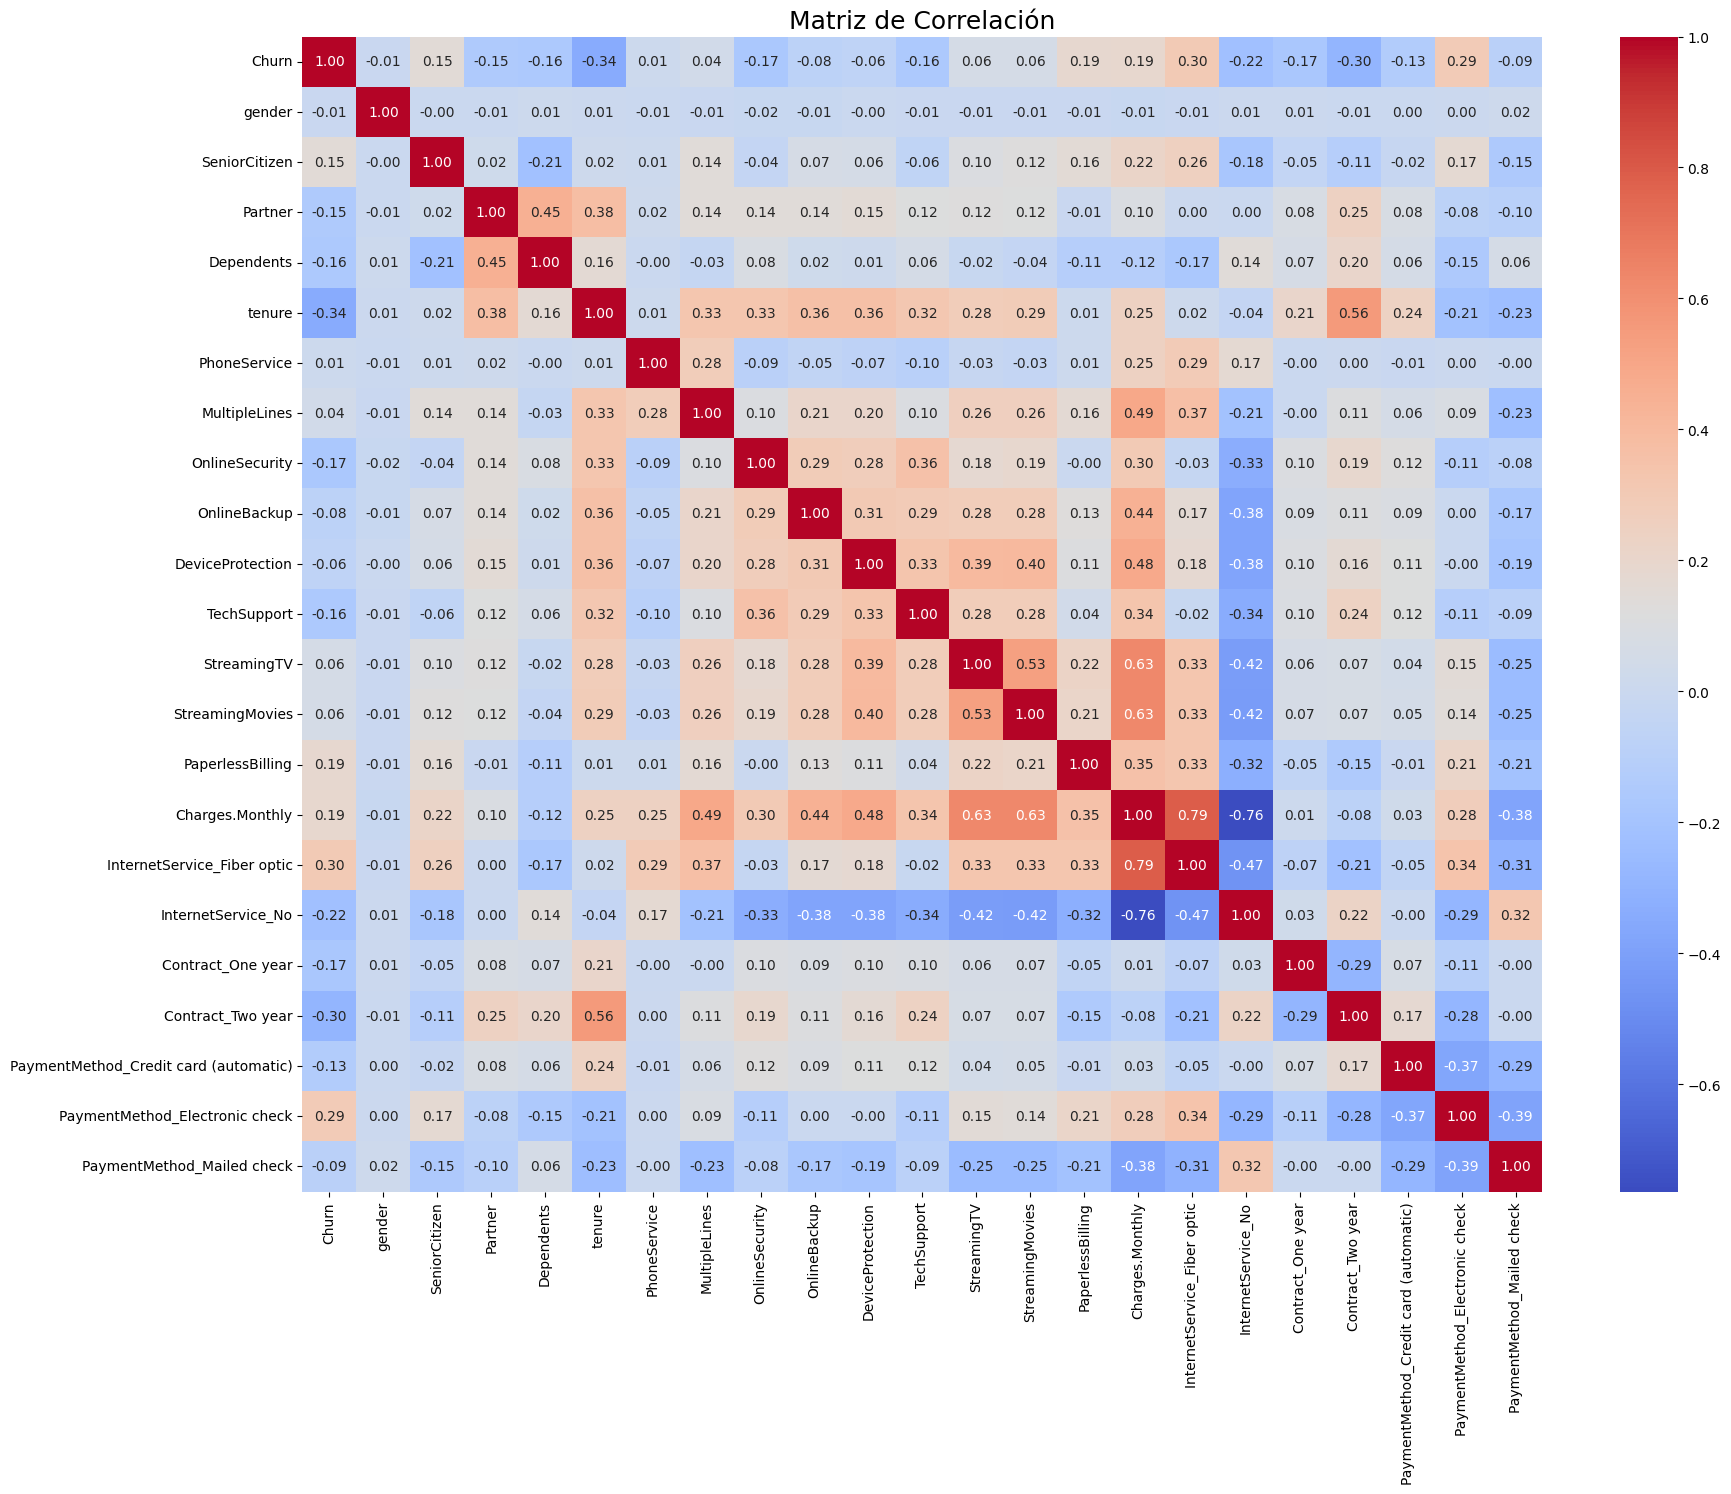

In [23]:
# Visualizando la matriz completa
# 1. Configurar el tamaño del gráfico
plt.figure(figsize=(20, 15))

# 2. Crear el heatmap
heatmap = sns.heatmap(matriz_correlacion,
                      annot=True,
                      cmap='coolwarm',
                      fmt='.2f')

# 3. Añadir un título
plt.title('Matriz de Correlación', fontsize=18)

# 4. Mostrar el gráfico
plt.show()

Al analizar la correlación ahora es más claro definir la lista de las variables más prometedoras para el modelo:
* Predictores de Churn: tenure, Contract_Two year, Contract_One year, InternetService_No, InternetService_Fiber optic, PaymentMethod_Electronic check, Charges.Monthly.

Y también ha mostrado cuáles son probablemente menos importantes:
* Predictores débiles: gender, PhoneService, MultipleLines.

## Análisis Dirigido

Investigación 1: Tiempo de Contrato (Contract) vs. Cancelación (Churn)

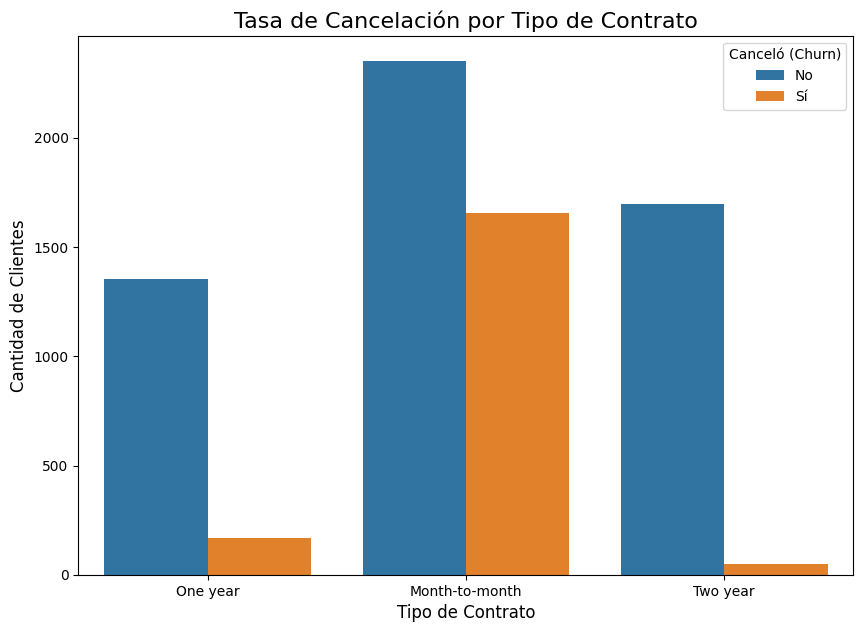

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 7))

# Crear el gráfico de conteo
sns.countplot(x='Contract', hue='Churn', data=df_preparado)

# Añadir títulos y etiquetas para mayor claridad
plt.title('Tasa de Cancelación por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Canceló (Churn)', labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()

Investigación 2: Gasto Mensual (Charges.Monthly) vs. Cancelación (Churn)

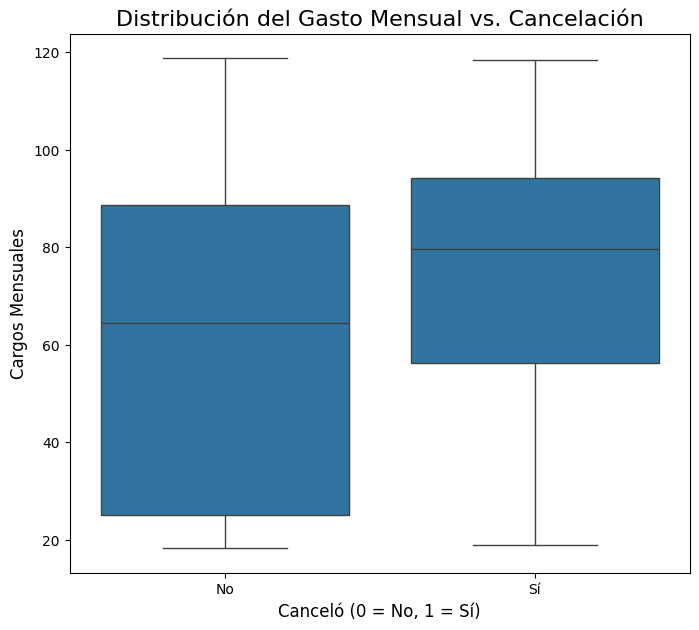

In [27]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 7))

# Crear el boxplot
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_preparado)

# Añadir títulos y etiquetas
plt.title('Distribución del Gasto Mensual vs. Cancelación', fontsize=16)
plt.xlabel('Canceló (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Cargos Mensuales', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])

# Mostrar el gráfico
plt.show()

Investigación Extra Esencial: Antigüedad (tenure) vs. Cancelación (Churn)

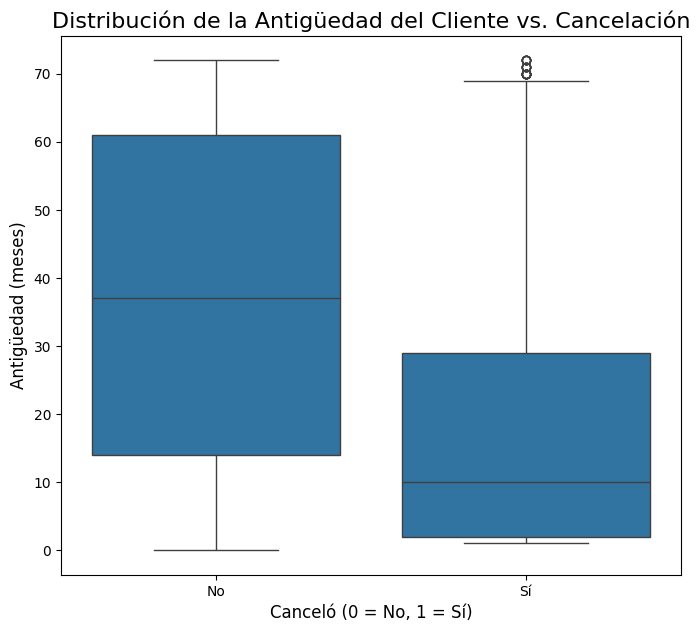

In [29]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 7))

# Crear el boxplot
sns.boxplot(x='Churn', y='tenure', data=df_preparado)

# Añadir títulos y etiquetas
plt.title('Distribución de la Antigüedad del Cliente vs. Cancelación', fontsize=16)
plt.xlabel('Canceló (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Antigüedad (meses)', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])

# Mostrar el gráfico
plt.show()

# 🤖 Modelado Predictivo

## Separación de Datos (Entrenamiento y Prueba)

Dividir los datos para simular este escenario:
* Conjunto de Entrenamiento (70%): El modelo los usará para aprender los patrones del churn.
* Conjunto de Prueba (30%): Son datos que el modelo nunca ha visto. Su rendimiento aquí nos dirá qué tan bien generaliza a nuevos clientes.

In [30]:
from sklearn.model_selection import train_test_split

# Partimos del DataFrame df_codificado de One-Hot Encoding

# 1. Definir X (las características) y y (la variable objetivo)
X = df_codificado.drop('Churn', axis=1) # Todas las columnas MENOS Churn
y = df_codificado['Churn']              # SOLAMENTE la columna Churn

# 2. Realizar la división
# Usaremos 70% para entrenar y 30% para probar
# random_state=42 asegura que la división sea siempre la misma, para que los resultados sean reproducibles
# stratify=y es CRÍTICO para asegurar que la proporción de Churn (73%/27%) se mantenga en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 3. Verificar la división
print("Forma del conjunto de datos original:", X.shape)
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)

print("\nProporción de Churn en el y_train original:")
print(y_train.value_counts(normalize=True))
print("\nProporción de Churn en el y_test:")
print(y_test.value_counts(normalize=True))

Forma del conjunto de datos original: (7267, 22)
Forma del conjunto de entrenamiento (X_train): (5086, 22)
Forma del conjunto de prueba (X_test): (2181, 22)

Proporción de Churn en el y_train original:
Churn
0    0.742823
1    0.257177
Name: proportion, dtype: float64

Proporción de Churn en el y_test:
Churn
0    0.742779
1    0.257221
Name: proportion, dtype: float64


## Creación de Modelos

Creacion de dos modelos, como se sugiere: una Regresión Logística (que necesita normalización) y un Random Forest (que no la necesita).

**Modelo A**: Regresión Logística (con Normalización y Balanceo:SMOTE)
Este modelo es sensible a la escala. La mejor manera de hacerlo profesionalmente es con un Pipeline, que encadena estos pasos y previene la fuga de datos.

In [31]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline # Usamos el pipeline de imblearn para que SMOTE funcione bien

# 1. Definir los pasos del pipeline
# Paso 1: Balancear los datos con SMOTE
# Paso 2: Normalizar las características a una escala de 0 a 1
# Paso 3: Aplicar el modelo de Regresión Logística
modelo_logistico = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', MinMaxScaler()),
    ('log_reg', LogisticRegression(random_state=42))
])

# 2. Entrenar el modelo
print("Entrenando el Pipeline de Regresión Logística...")
modelo_logistico.fit(X_train, y_train)
print("¡Entrenamiento completado!")

Entrenando el Pipeline de Regresión Logística...
¡Entrenamiento completado!


**Modelo B**: Random Forest (sin Normalización ni Balanceo inicial)
Este modelo basado en árboles no es sensible a la escala. Podemos entrenarlo directamente.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar el modelo
# random_state=42 para reproducibilidad
# n_estimators=100 es un buen punto de partida (100 árboles de decisión)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar el modelo
print("\nEntrenando el modelo Random Forest...")
modelo_rf.fit(X_train, y_train)
print("¡Entrenamiento completado!")


Entrenando el modelo Random Forest...
¡Entrenamiento completado!


## Evaluación de los Modelos

validación de modelos y métricas:
* Precisión (Precision): De todos los que predijimos que cancelarían, ¿cuántos realmente lo hicieron? (Mide la calidad de nuestras predicciones positivas).
* Recall (Sensibilidad): De todos los que realmente cancelaron, ¿a cuántos logramos identificar? (Mide nuestra capacidad para "atrapar" a los clientes en riesgo).
* F1-Score: El promedio armónico entre Precisión y Recall. Es un gran indicador general del rendimiento.
* Matriz de Confusión: Una tabla que desglosa nuestros aciertos y errores (Verdaderos Positivos, Falsos Negativos, etc.).

EVALUACIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1620
           1       0.53      0.65      0.59       561

    accuracy                           0.76      2181
   macro avg       0.70      0.73      0.71      2181
weighted avg       0.78      0.76      0.77      2181



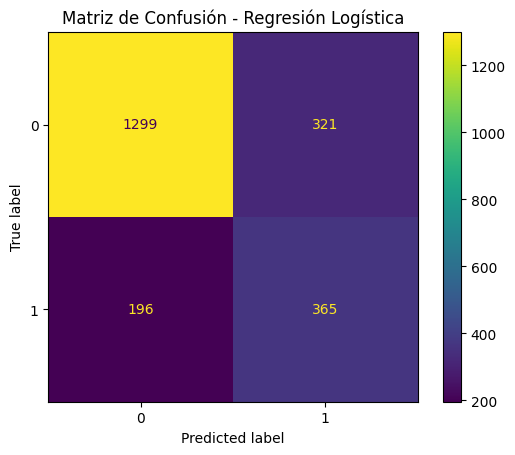


EVALUACIÓN DEL MODELO RANDOM FOREST
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1620
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2181
   macro avg       0.72      0.68      0.70      2181
weighted avg       0.77      0.78      0.78      2181



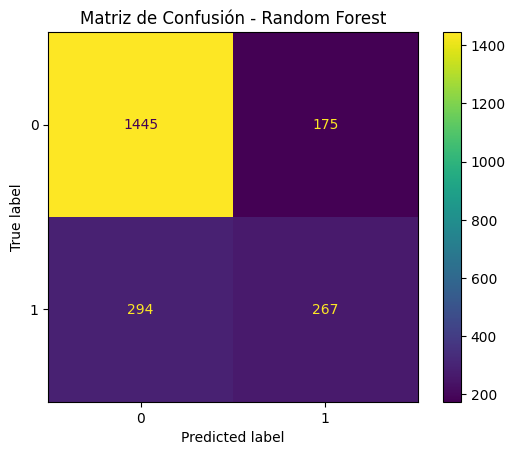

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Hacer predicciones en el conjunto de prueba
predicciones_log = modelo_logistico.predict(X_test)
predicciones_rf = modelo_rf.predict(X_test)

# 2. Evaluar el Modelo Logístico
print("="*30)
print("EVALUACIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA")
print("="*30)
# classification_report nos da un resumen conveniente de las métricas principales
print(classification_report(y_test, predicciones_log))

# Visualizar la Matriz de Confusión
cm_log = confusion_matrix(y_test, predicciones_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot()
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


# 3. Evaluar el Modelo Random Forest
print("\n" + "="*30)
print("EVALUACIÓN DEL MODELO RANDOM FOREST")
print("="*30)
print(classification_report(y_test, predicciones_rf))

# Visualizar la Matriz de Confusión
cm_rf = confusion_matrix(y_test, predicciones_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Matriz de Confusión - Random Forest')
plt.show()

¿Hay Overfitting o Underfitting?

Un modelo sufre de overfitting cuando es perfecto en los datos de entrenamiento pero malo en los de prueba.

In [36]:
# Compara el rendimiento en entrenamiento vs. prueba
print("Rendimiento del Random Forest:")
print(f"Accuracy en Entrenamiento: {accuracy_score(y_train, modelo_rf.predict(X_train)):.4f}")
print(f"Accuracy en Prueba: {accuracy_score(y_test, predicciones_rf):.4f}")

print("\nRendimiento de la Regresión Logística:")
print(f"Accuracy en Entrenamiento: {accuracy_score(y_train, modelo_logistico.predict(X_train)):.4f}")
print(f"Accuracy en Prueba: {accuracy_score(y_test, predicciones_log):.4f}")

Rendimiento del Random Forest:
Accuracy en Entrenamiento: 0.9917
Accuracy en Prueba: 0.7850

Rendimiento de la Regresión Logística:
Accuracy en Entrenamiento: 0.7674
Accuracy en Prueba: 0.7630


# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Extrayendo la Importancia del Random Forest

El modelo Random Forest calcula automáticamente qué tan útil fue cada variable para tomar sus decisiones de clasificación. Podemos extraer y visualizar esta información.

Importancia de cada característica según el modelo Random Forest:
                           Característica  Importancia
4                                  tenure     0.240669
14                        Charges.Monthly     0.234924
20         PaymentMethod_Electronic check     0.043933
15            InternetService_Fiber optic     0.043210
0                                  gender     0.037088
18                      Contract_Two year     0.032714
13                       PaperlessBilling     0.031753
2                                 Partner     0.028249
7                          OnlineSecurity     0.027459
8                            OnlineBackup     0.027166
1                           SeniorCitizen     0.025800
10                            TechSupport     0.025668
6                           MultipleLines     0.025555
17                      Contract_One year     0.025247
9                        DeviceProtection     0.023858
3                              Dependents     0.023712

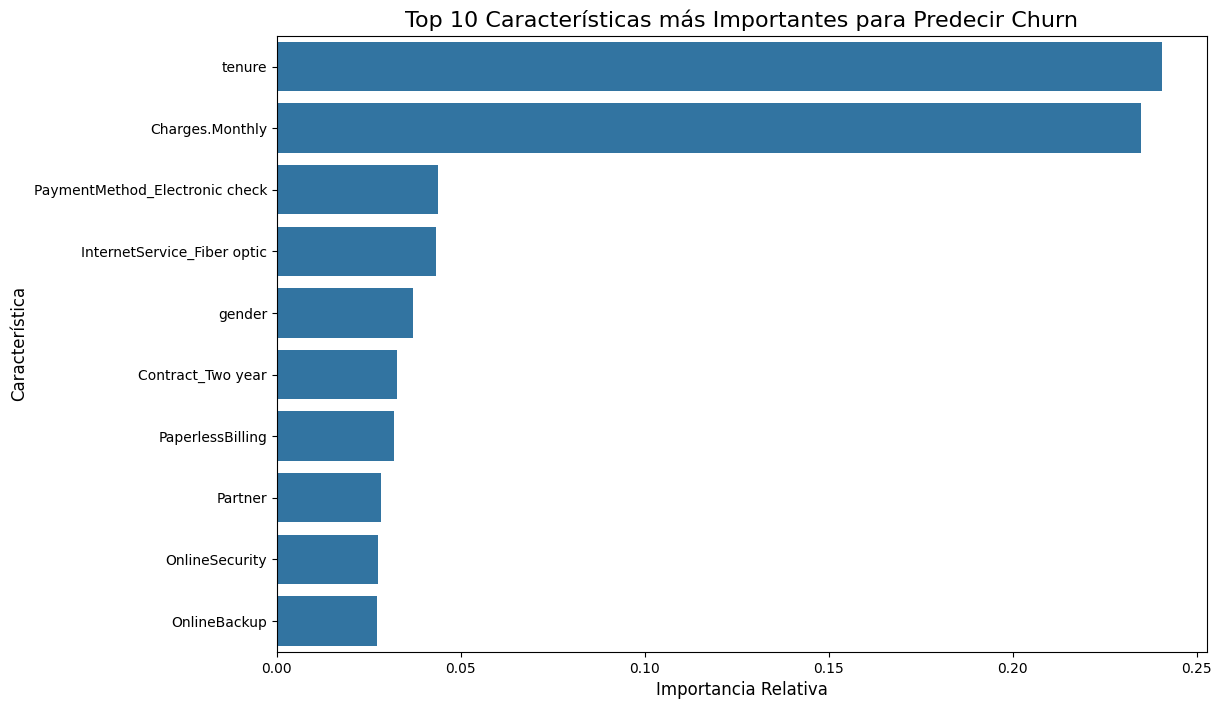

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Partimos del modelo Random Forest ya entrenado (modelo_rf) y de los datos X_train

# 1. Obtener la importancia de las características
importancias = modelo_rf.feature_importances_

# 2. Crear un DataFrame para visualizar mejor
df_importancias = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

print("Importancia de cada característica según el modelo Random Forest:")
print(df_importancias)

# 3. Visualizar las importancias en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Característica', data=df_importancias.head(10)) # Mostramos las 10 más importantes
plt.title('Top 10 Características más Importantes para Predecir Churn', fontsize=16)
plt.xlabel('Importancia Relativa', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.show()

# Informe Final: Predicción y Reducción de la Cancelación de Clientes en Telecom X


El presente informe detalla los resultados del proyecto de predicción de cancelación de clientes (churn). El objetivo fue identificar los factores clave que impulsan la pérdida de clientes y desarrollar un modelo de Machine Learning para predecir qué clientes tienen mayor probabilidad de abandonar el servicio.

El análisis reveló un perfil de cliente de alto riesgo claro y consistente: aquel con baja antigüedad (especialmente en su primer año), un contrato mes a mes, y cargos mensuales elevados.

Se desarrolló y evaluó un modelo de Regresión Logística que demostró ser la herramienta más robusta y eficaz para el negocio. Este modelo es capaz de identificar correctamente al 65% de los clientes que están a punto de cancelar, proporcionando una base sólida para acciones de retención proactivas. Con base en estos hallazgos, se proponen tres estrategias de retención dirigidas que tienen el potencial de reducir significativamente la tasa de churn, mejorar la lealtad del cliente y proteger los ingresos de la compañía.

**Contexto del Problema**

La cancelación de clientes es uno de los mayores desafíos para Telecom X, impactando directamente en la rentabilidad y el crecimiento. El objetivo de este proyecto fue pasar de una estrategia reactiva a una proactiva, utilizando la ciencia de datos para anticipar qué clientes se irán y entender por qué lo hacen.

## 1. Principales Factores que Afectan la Cancelación de Clientes:

El Perfil del Cliente en Riesgo

Nuestro análisis, que combina métodos estadísticos y de Machine Learning, identificó los siguientes factores como los predictores más importantes del churn, en orden de influencia:

* Tipo de Contrato (Contract): La flexibilidad del contrato mes a mes (Month-to-month) es un catalizador masivo para el churn. Los clientes sin un compromiso a largo plazo son significativamente más propensos a cancelar que aquellos con contratos anuales o bianuales.

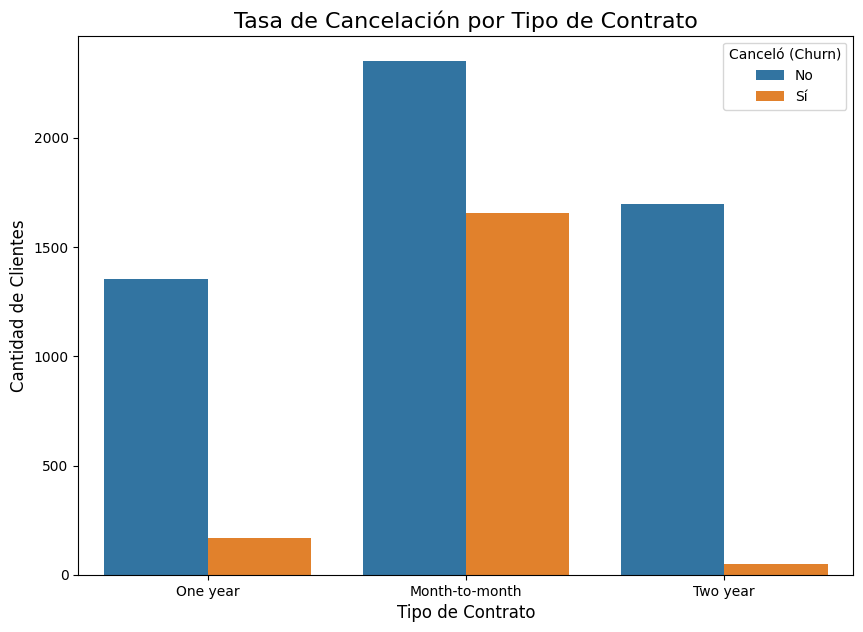

Gráfico 1. Tasa de Cancelación por Tipo de Contrato

El factor individual más determinante es el tipo de contrato. Como se puede observar en el Gráfico 1, la gran mayoría de las cancelaciones provienen de clientes con contratos mes a mes, mientras que aquellos con compromisos a largo plazo muestran una tasa de cancelación casi nula.

* Cargos Mensuales (Charges.Monthly): El segundo factor más poderoso. A medida que la factura mensual aumenta, también lo hace la probabilidad de cancelación, sugiriendo una alta sensibilidad al precio, especialmente en segmentos con facturas superiores a los $75.

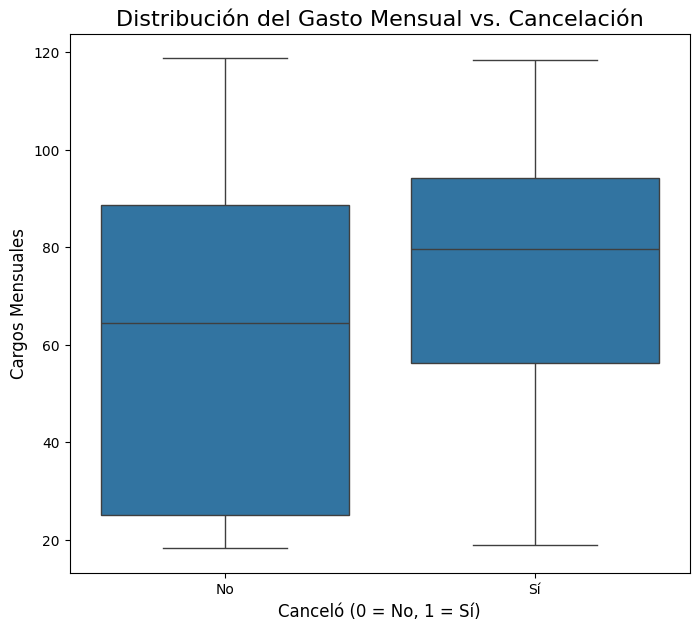

Gráfico 2. Gasto Mensual y Antigüedad

Adicionalmente, la antigüedad y el costo mensual son predictores extremadamente fuertes. El Gráfico 2 muestra que los clientes que cancelan tienen, en promedio, una antigüedad mucho menor (mediana de 10 meses) en comparación con los clientes leales (mediana de 37 meses).

* Antigüedad del Cliente (tenure): El factor más dominante. El riesgo de cancelación es inversamente proporcional a la antigüedad. La mayoría de las cancelaciones ocurren durante los primeros 12 meses, haciendo de este un período crítico para la fidelización.

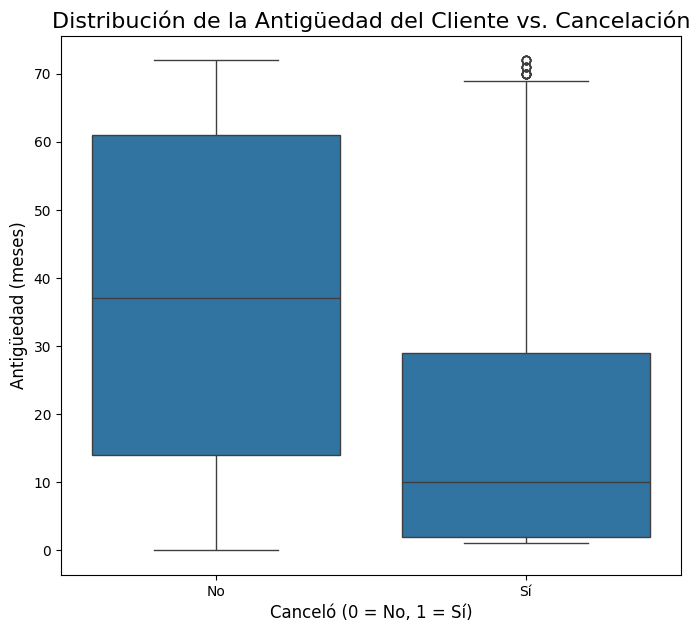

Gráfico 3: Distribución de la Antigüedad del Cliente vs. Cancelación

De manera similar, el Gráfico 3 revela que los clientes que abandonan el servicio tienden a pagar facturas mensuales considerablemente más altas, confirmando que el precio es un factor sensible.

* Factores Secundarios Relevantes: El uso de cheque electrónico como método de pago y tener un servicio de Fibra Óptica (generalmente asociado a un mayor costo) también se correlacionan con un mayor riesgo de cancelación.

## 2. Modelo Predictivo Seleccionado y su Rendimiento:

Para predecir el churn, se desarrollaron dos modelos de clasificación: una Regresión Logística y un Random Forest. Tras una evaluación rigurosa, el modelo seleccionado como el más adecuado para los objetivos de negocio es la Regresión Logística.

Justificación de la Elección:
* En cuanto al Recall (Sensibilidad), la regresión logística alcanza un 65%, lo que significa que identifica correctamente a 2 de cada 3 clientes que cancelarán. Este resultado es crucial para no perder oportunidades de retención y supera claramente al Random Forest, que solo logra un 48%.
* Respecto a la Precisión, el Random Forest obtiene un 60% frente al 53% de la regresión logística, lo que implica que genera menos "falsas alarmas". Sin embargo, debido a su bajo Recall, este modelo resulta menos útil en la práctica, ya que no identifica de manera adecuada a los clientes en riesgo.

* Al analizar el F1-Score, que mide el balance entre precisión y recall, la regresión logística vuelve a destacarse con un valor de 0.59 frente al 0.53 del Random Forest. Esto evidencia un mejor equilibrio general en la predicción de cancelaciones, lo que refuerza su utilidad en escenarios reales.

* Finalmente, en cuanto a la robustez del modelo, la regresión logística se muestra excelente, ya que es estable y generaliza bien a nuevos datos. En contraste, el Random Forest sufre de overfitting al memorizar excesivamente los datos de entrenamiento, lo que reduce su desempeño en situaciones no vistas.





Para validar estos hallazgos, se analizó la importancia de las características directamente desde nuestro modelo de Machine Learning más avanzado (Random Forest). El Gráfico 4 confirma que la antigüedad (tenure) y los cargos mensuales (Charges.Monthly) son, con un margen significativo, las variables más influyentes que el modelo utiliza para hacer sus predicciones, reforzando las conclusiones de nuestro análisis exploratorio.

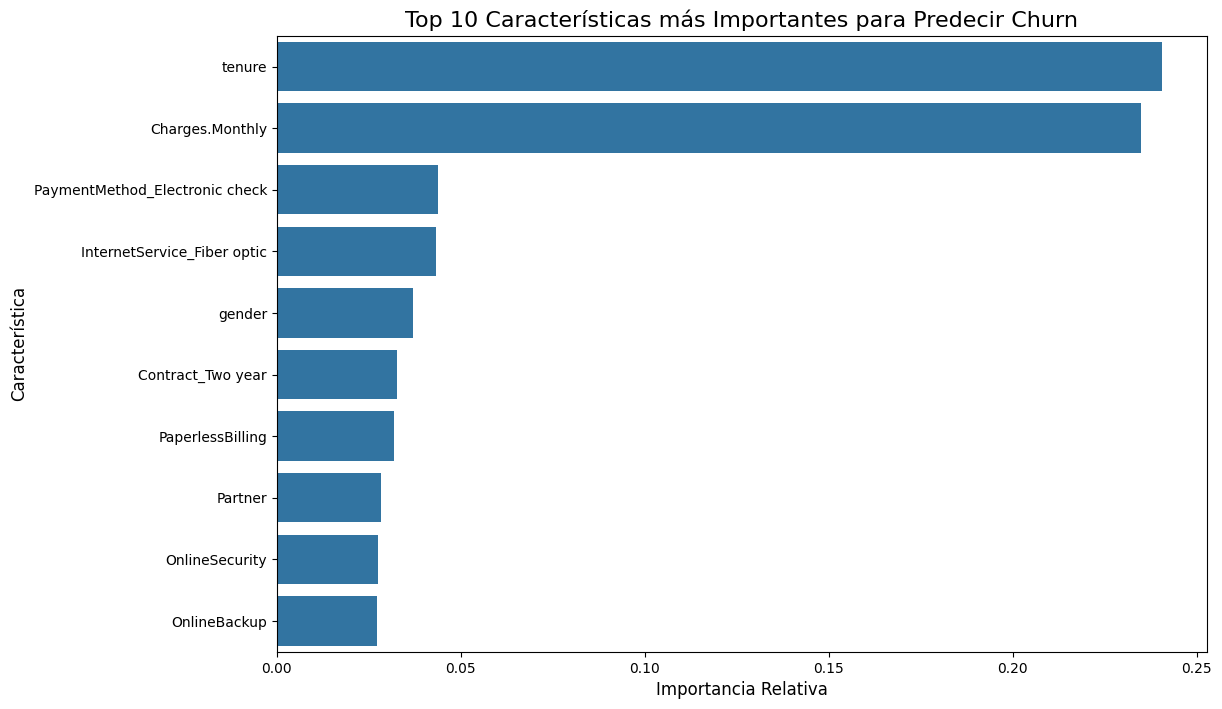

Gráfico 4: Importancia Relativa de las Características para la Predicción de Churn

## Estrategias de Retención Recomendadas

Con base en los hallazgos, proponemos las siguientes tres acciones estratégicas y basadas en datos:

1. Campaña “Asegura tu Tarifa”: Ofrecer a los clientes que pagan mes a mes un contrato de un año con 10% de descuento. Así se fomenta que se queden más tiempo y se reduce el riesgo de que se vayan.

2. Programa “Primer Año Crítico”: Dar más atención a los clientes nuevos con llamadas de bienvenida, encuestas y ofertas especiales antes de cumplir su primer año. Esto ayuda a que tengan una buena experiencia desde el inicio y no cancelen rápido.

3. Alertas para clientes en riesgo: Usar el modelo de predicción para detectar clientes con alta probabilidad de irse (contrato mes a mes, facturas altas y menos de un año de antigüedad). El equipo de retención podrá contactarlos a tiempo y ofrecer soluciones personalizadas.

## Conclusión

Este proyecto ha demostrado que el churn de clientes es un fenómeno predecible. Armados con un modelo predictivo robusto y un entendimiento claro de los factores que lo impulsan, Telecom X tiene la oportunidad de transformar su enfoque de retención, pasando de ser reactivo a proactivo. La implementación de las estrategias recomendadas permitirá a la empresa no solo reducir las cancelaciones, sino también construir relaciones más fuertes y duraderas con sus clientes.
